<a href="https://colab.research.google.com/github/Yahia0mohamed/ML_projects/blob/main/ClassificationUsingRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning**

This project consists of 2 classification problems using linear regrission

# **Importing libraries for the project**

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
print("done importing")

done importing


# **Problem 1**

A binary classification problem

In [98]:
#class 1 is +ve and class 2 is -ve for the sake of the classification
x=np.array([[1,2],[1,3],[1,7],[1,9],[1,10]])
y=np.array([1,1,-1,-1,-1])
print(f"the shape of x is {x.shape} and x = \n{x}\n and the shape of y is {y.shape} and y = {y}")

#y= (w . x) + b  => w = (xT . y) . inv(x . xT)

w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)

print(f"\nthis is the weights using MSSE to obtain the weights are [{w[0]},{w[1]}] and the shape of w is {w.shape}")

# proofing the W calculated
y_proof = np.dot(x, w)
y_proof_binary = np.where(y_proof >= 0, 1, -1)

print(f"Predicted values of y (binary classification):{ y_proof_binary}\nOriginal predicted values of y:{y_proof}")

the shape of x is (5, 2) and x = 
[[ 1  2]
 [ 1  3]
 [ 1  7]
 [ 1  9]
 [ 1 10]]
 and the shape of y is (5,) and y = [ 1  1 -1 -1 -1]

this is the weights using MSSE to obtain the weights are [1.606299212598425,-0.2913385826771653] and the shape of w is (2,)
Predicted values of y (binary classification):[ 1  1 -1 -1 -1]
Original predicted values of y:[ 1.02362205  0.73228346 -0.43307087 -1.01574803 -1.30708661]


In [107]:
#the iteration with noise
def addNoise(noRow,noCol):
  return np.random.normal(0,1,size=(noRow,noCol))

noise=addNoise(x.shape[0],x.shape[1])
x_noisy= x + noise

print(f"the noise = \n{noise}\n and it's shape is {noise.shape}\n the noisy x = \n{x_noisy}  and it's shape = {x_noisy.shape}")

w_noisy = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)

print(f"\nthis is the weights using MSSE to obtain the weights are [{w_noisy[0]},{w_noisy[1]}] and the shape of w is {w_noisy.shape}")

# proofing the W calculated
y_noisyProof = np.dot(x_noisy, w_noisy)
y_noisyProof_binary = np.where(y_noisyProof >= 0, 1, -1)

print(f"Predicted values of y (binary classification):{y_noisyProof_binary}\nOriginal predicted values of y:{y_noisyProof}")

the noise = 
[[-0.24438098 -0.17816545]
 [-1.29482202 -0.17181029]
 [ 0.84373158 -0.02879132]
 [ 0.01799403  0.53842792]
 [ 0.31591258  0.45826032]]
 and it's shape is (5, 2)
 the noisy x = 
[[ 0.75561902  1.82183455]
 [-0.29482202  2.82818971]
 [ 1.84373158  6.97120868]
 [ 1.01799403  9.53842792]
 [ 1.31591258 10.45826032]]  and it's shape = (5, 2)

this is the weights using MSSE to obtain the weights are [1.606299212598425,-0.2913385826771653] and the shape of w is (2,)
Predicted values of y (binary classification):[ 1 -1  1 -1 -1]
Original predicted values of y:[ 0.68297953 -1.29753317  0.93060253 -1.14370906 -0.93314539]


**ploting the two functions to see the difference between noise and without it**

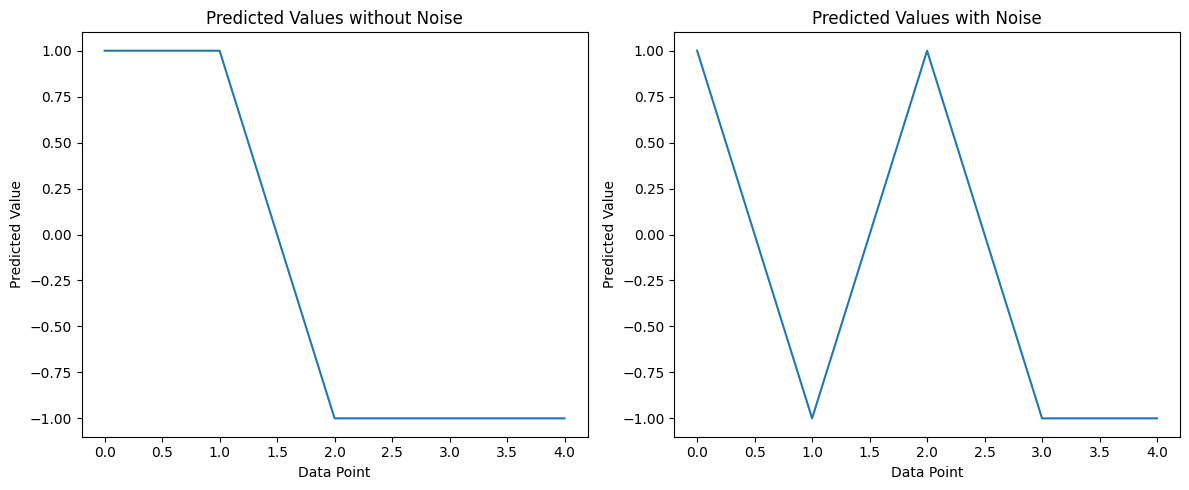

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot without noise
sns.lineplot(x=np.arange(len(y_proof_binary)), y=y_proof_binary, ax=axes[0])
axes[0].set_xlabel('Data Point')
axes[0].set_ylabel('Predicted Value')
axes[0].set_title('Predicted Values without Noise')

# Plot with noise
sns.lineplot(x=np.arange(len(y_noisyProof_binary)), y=y_noisyProof_binary, ax=axes[1])
axes[1].set_xlabel('Data Point')
axes[1].set_ylabel('Predicted Value')
axes[1].set_title('Predicted Values with Noise')

plt.tight_layout()
plt.show()

# **problem 2**

Classification problem using the Iris Dataset

In [109]:
irisData=pd.read_csv("/content/Iris.csv")
#preprocessing

new_column_names = {
    'Id':'id',
    'SepalLengthCm': 'sepal_width',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'target'
    }
irisData.rename(columns=new_column_names, inplace=True)


dummiesDict={
    'Iris-setosa':1,
    'Iris-versicolor':-1,
    'Iris-virginica':-1
}

irisData['target'] = irisData['target'].map(dummiesDict)
irisData=irisData.drop(columns=['id'])

irisData.head()

,sepal_width,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


**splitting data to train and test**

In [110]:
# Split C1 into 40 samples for train and 10 samples for test
C1_train = irisData[irisData['target'] == 1].sample(n=40, random_state=42)
C1_test = irisData[irisData['target'] == 1].drop(C1_train.index)

# Split C2 into 80 samples for train and 20 samples for test
C2_train = irisData[irisData['target'] == -1].sample(n=80, random_state=42)
C2_test = irisData[irisData['target'] == -1].drop(C2_train.index)

# Concatenate the datasets
train_data = pd.concat([C1_train, C2_train])
test_data = pd.concat([C1_test, C2_test])

trainX = train_data.sample(frac=1,random_state=42)
testX =test_data.sample(frac=1,random_state=42)

#splitted data and randomized
x_train = trainX.drop(columns=['target'])
x_test = testX.drop(columns=['target'])

y_train = trainX['target']
y_test = testX['target']

# Display the shapes of the resulting datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (120, 4)
y_train shape: (120,)
x_test shape: (30, 4)
y_test shape: (30,)


**converting them to numpy arrays and training the MSSE model**

In [111]:
x=x_train.to_numpy()
y=y_train.to_numpy()

w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
print(w)

y_pred=np.dot(x_test.to_numpy(),w)
y_pred_binary = np.where(y_pred >= 0, 1, -1)

accuracy = np.mean(y_pred_binary == y_test.to_numpy().T)
print(f"Accuracy: { accuracy*100}%")

[ 0.07899862  0.35712006 -0.49327059 -0.0161304 ]
Accuracy: 100.0%


**plotting the w**

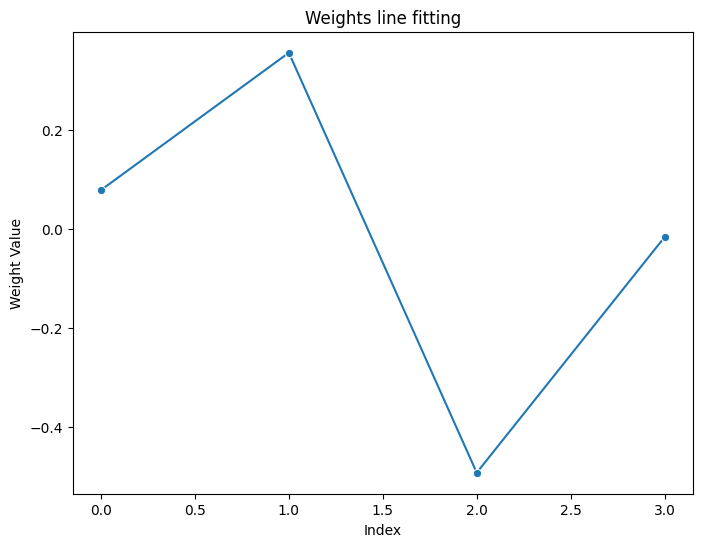

In [112]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=np.arange(len(w)), y=w.flatten(), marker='o')
plt.xlabel('Index')
plt.ylabel('Weight Value')
plt.title('Weights line fitting')
plt.show()